
## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:



In [1]:
# Your code here - remember to use markdown cells for comments as well!

import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
!ls Data

bom.movie_gross.csv
im.db
rt.movie_info.tsv
rt.reviews.tsv
tmdb.movies.csv
tn.movie_budgets.csv


In [3]:
# bom_mov = pd.read_csv("data/bom.movie_gross.csv")

In [4]:
# rt = pd.read_csv("data/rt.movie_info.tsv", sep='\t')

In [5]:
# rt_rev = pd.read_table("data/rt.reviews.tsv", encoding= 'latin1')

In [62]:
bom_mov = pd.read_csv("data/bom.movie_gross.csv")
rt = pd.read_csv("data/rt.movie_info.tsv", sep='\t')
rt_rev = pd.read_table("data/rt.reviews.tsv", encoding= 'latin1')
tmdb = pd.read_csv("data/tmdb.movies.csv")

conn = sqlite3.connect("Data/im.db")
imdb = pd.read_sql("""
SELECT *
  FROM sqlite_master 
 WHERE type = 'table';
""", conn)

imdb_principals = pd.read_sql("SELECT * FROM principals", conn)
imdb_persons = pd.read_sql("SELECT * FROM persons", conn)
imdb_movie_akas = pd.read_sql("SELECT * FROM movie_akas", conn)
imdb_movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)
imdb_movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)

In [7]:

# tmdb = pd.read_csv("data/tmdb.movies.csv")


# conn = sqlite3.connect("Data/im.db")
# imdb = pd.read_sql("""
# SELECT *
#   FROM sqlite_master 
#  WHERE type = 'table';
# """, conn)

In [8]:
fm = pd.merge(tmdb, bom_mov, how = 'inner', on = 'title').copy()

fm['domestic_gross'].dropna(axis = 'index', how = 'any')
fm.dropna(subset = ['domestic_gross'], inplace=True)

fm['foreign_gross'].fillna(0, inplace=True)
fm['foreign_gross'] = pd.to_numeric(fm['foreign_gross'], errors='coerce')

In [9]:
fm['worldwide_gross'] = fm['domestic_gross'] + fm['foreign_gross']

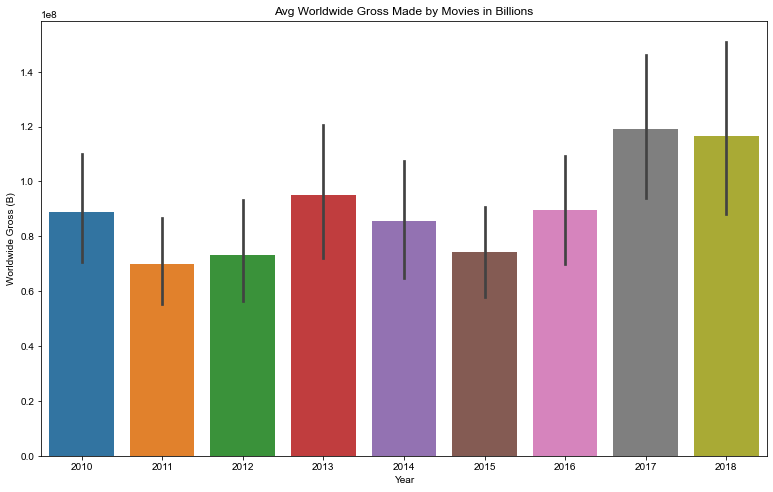

In [10]:
fig, ax = plt.subplots(figsize=(13,8))
sns.barplot(x = fm['year'], y = fm['worldwide_gross'], ax=ax);
sns.set(font_scale=1)

ax.set_xlabel("Year")
ax.set_ylabel("Worldwide Gross (B)")
ax.set_title("Avg Worldwide Gross Made by Movies in Billions")
plt.show()

In [11]:
tn = pd.read_csv("data/tn.movie_budgets.csv")
tn_copy = tn.copy()

In [12]:
tn['release_date'] = pd.to_datetime(tn['release_date']).dt.year  # Getting the YEAR from release_date
tn['release_date'] = pd.to_numeric(tn['release_date'])           # Converting to numeric
tn = tn[tn['release_date'] > 1999]                               # Years above 1999

# Cleaning worldwide gross column 
                                                                 # Replacing symbols then to_numeric
tn['worldwide_gross'] = pd.to_numeric(tn['worldwide_gross'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
tn['worldwide_gross'] = tn['worldwide_gross'] * 1                # All numbers to positive
tn = tn[(tn['worldwide_gross'] > 100000000) & (tn['worldwide_gross'] < 2000000000)]
                                                                # All worldwide_gross greater than 30000000

# Cleaning production budget column 
                                                                 # Replacing symbols then to_numeric
tn['production_budget'] = pd.to_numeric(tn['production_budget'].replace({'\$': '', ',': ''}, regex=True), errors='coerce')
tn['production_budget'] = tn['production_budget'] * 1            # All numbers to positive
tn = tn[tn['production_budget'] > 0]                             # All production_budget greater than 0

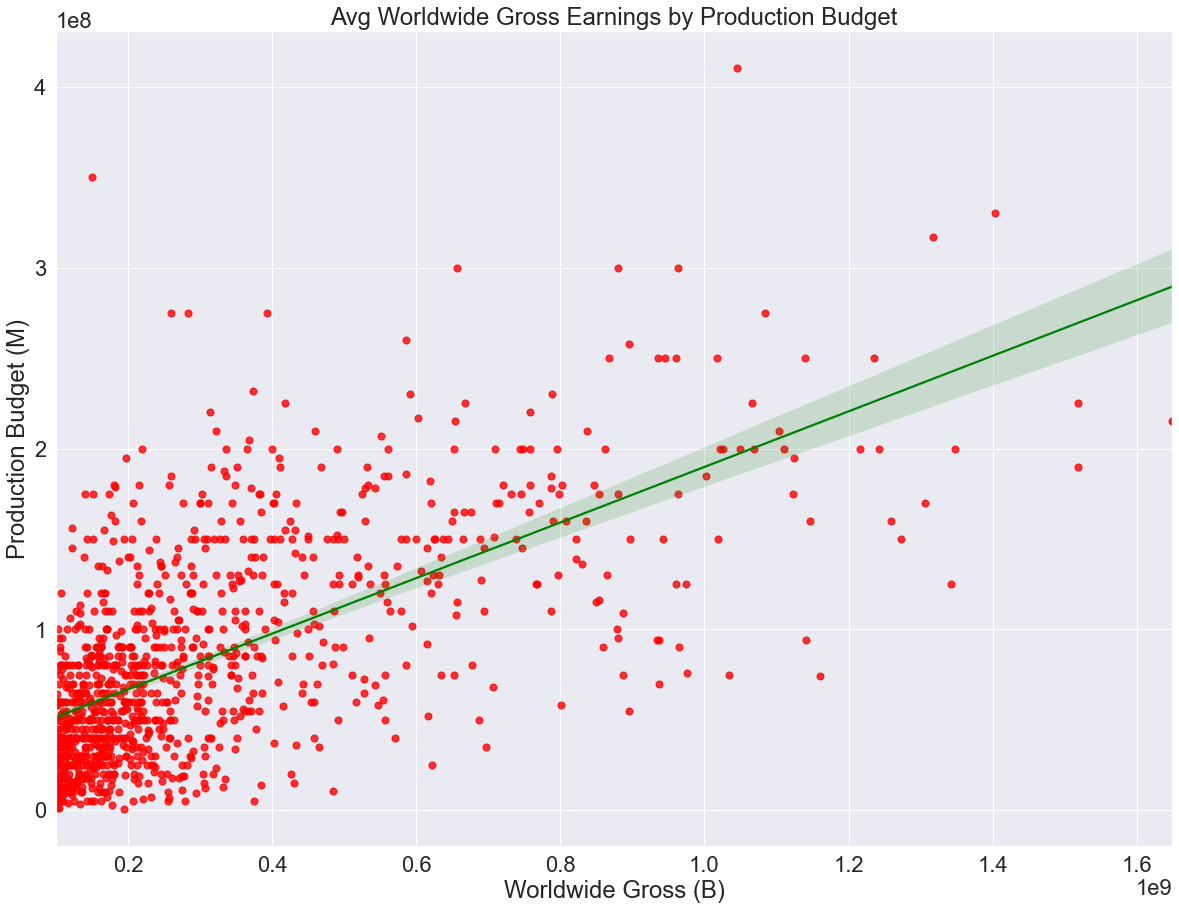

In [69]:
# production_budget / worldwide_gross correlation plot

fig, ax = plt.subplots(figsize=(20,15))
sns.regplot(x = tn['worldwide_gross'], y = tn['production_budget'], scatter=True, color="red", ci=95, scatter_kws={'s':50}, line_kws={'color':'green'})
sns.set(font_scale=2)

ax.set_xlabel("Worldwide Gross (B)")
ax.set_ylabel("Production Budget (M)")
ax.set_title("Avg Worldwide Gross Earnings by Production Budget")

plt.show()

In [14]:
tn_copy['release_date'] = pd.to_datetime(tn_copy['release_date'])
tn_copy['month'] = tn_copy['release_date'].dt.month
tn_copy['worldwide_gross'] = tn_copy['worldwide_gross'].apply(lambda x: int(x.replace('$','').replace(',','')))
monthly_gross = tn_copy.groupby('month')['worldwide_gross'].sum()

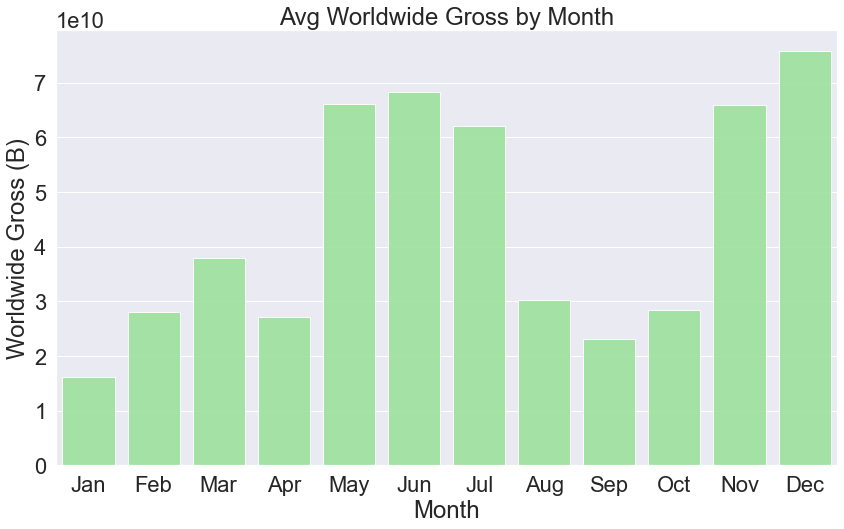

In [15]:
import calendar

x = [calendar.month_abbr[i] for i in monthly_gross.index]
y = monthly_gross.values

fig, ax = plt.subplots(figsize=(14,8))
sns.barplot(x, y, color="lightgreen", alpha= 0.9)
ax.set_xlabel("Month")
ax.set_ylabel("Worldwide Gross (B)")
ax.set_title("Avg Worldwide Gross by Month")
plt.show()

In [16]:
# conn = sqlite3.connect("Data/im.db")
# imdb = pd.read_sql("""
# SELECT *
#   FROM sqlite_master 
#  WHERE type = 'table';
# """, conn)

In [17]:
# imdb_principals = pd.read_sql("SELECT * FROM principals", conn)
# imdb_persons = pd.read_sql("SELECT * FROM persons", conn)
# imdb_movie_akas = pd.read_sql("SELECT * FROM movie_akas", conn)
# imdb_movie_ratings = pd.read_sql("SELECT * FROM movie_ratings", conn)
# imdb_movie_basics = pd.read_sql("SELECT * FROM movie_basics", conn)

In [18]:
merged_imdb_people = pd.merge(imdb_principals, imdb_persons, how="inner", on='person_id')

In [19]:
akas_ratings_imdb = pd.merge(imdb_movie_akas, imdb_movie_ratings, how="inner", on='movie_id')
merged_imdb = pd.merge(akas_ratings_imdb, imdb_movie_basics, how="inner", on='movie_id')

In [20]:
genres = merged_imdb["genres"].str.split(",").explode().unique()
genres

array(['Action', 'Adventure', 'Sci-Fi', 'Drama', 'Documentary', 'Romance',
       'Family', 'Fantasy', 'Crime', 'Thriller', 'Comedy', 'Mystery',
       'Musical', 'Animation', 'Horror', 'Sport', 'Music', 'History',
       'Biography', None, 'War', 'News', 'Western', 'Reality-TV',
       'Game-Show', 'Adult'], dtype=object)

In [21]:
rating_genre = merged_imdb[merged_imdb['genres'].isin(genres)].groupby("genres")["averagerating"].mean().sort_values()

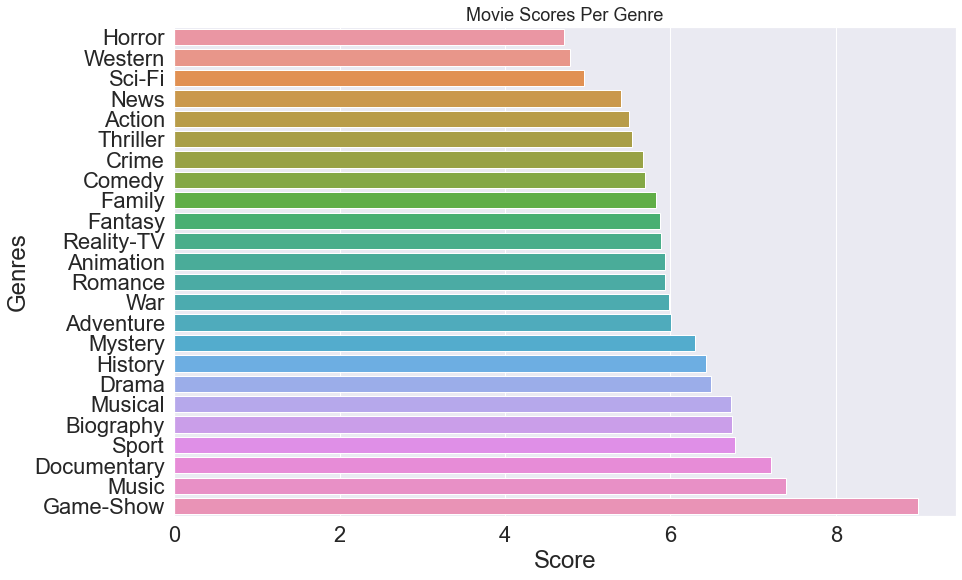

In [22]:
x = rating_genre.values
y = rating_genre.index

fig, ax = plt.subplots(figsize=(14,9))
sns.set(font_scale=1.5)
sns.set_palette("rocket")
sns.barplot(x,y)

ax.set_xlabel("Score")
ax.set_ylabel("Genres")

ax.set_title("Movie Scores Per Genre") 
# ax.tick_params(axis='x', rotation=75)
plt.show()

In [25]:
genre_id = {28:'Action', 12:'Adventure', 16:'Animation', 35:'Comedy', 80:'Crime',
            99:'Documentary', 18:'Drama', 10751:'Family', 14:'Fantasy', 36:'History',
            27:'Horror', 10402:'Music', 9648:'Mystery', 10749:'Romance',
            878:'Science Fiction', 10770:'TV Movie', 53:'Thriller', 10752:'War',
            37:'Western'}

In [26]:
fm['genre_ids'] = fm['genre_ids'].apply(lambda x: x if not pd.isna(x) else None)

In [27]:
import ast

fm_genres = fm[pd.notnull(fm['genre_ids'])]
fm_genres['genre_ids'] = fm_genres['genre_ids'].apply(lambda x: ast.literal_eval(x))
fm_genres['genre'] = fm_genres['genre_ids'].apply(lambda x: [genre_id[g] for g in x])
fm_genres['genre'] = fm_genres['genre'].apply(lambda x: ', '.join(x))

In [ ]:
review_rating = pd.merge(rt_rev, rt, how = 'inner', on = 'id').copy()

In [28]:
review_rating.dropna(subset = ['genre'], inplace=True)
review_rating['genre'] = review_rating['genre'].apply(lambda x: str(x.replace('|',',').replace('and',',').replace(' , ',',')))

In [29]:
filtered_rating = review_rating.drop_duplicates(subset='synopsis')
filtered_rating = filtered_rating.dropna(subset=['rating_y'])

In [30]:
filtered_fm_genres = fm_genres.drop_duplicates(subset='title')

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year,worldwide_gross,genre
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000.0,2010,4.949000e+08,"Fantasy, Adventure, Animation, Family"
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000.0,2010,6.239000e+08,"Adventure, Action, Science Fiction"
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000.0,2010,8.283000e+08,"Action, Science Fiction, Adventure"
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000.0,2010,1.067000e+09,"Animation, Family, Comedy"
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000.0,2010,5.431000e+08,"Animation, Family, Comedy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,25090,"[16, 10751, 12]",455842,en,Elliot: The Littlest Reindeer,2.903,2018-11-30,Elliot: The Littlest Reindeer,3.4,7,Scre.,24300.0,0.0,2018,2.430000e+04,"Animation, Family, Adventure"
2699,25148,"[28, 12, 16]",332718,en,Bilal: A New Breed of Hero,2.707,2018-02-02,Bilal: A New Breed of Hero,6.8,54,VE,491000.0,1700000.0,2018,2.191000e+06,"Action, Adventure, Animation"
2700,25189,[35],498919,es,La Boda de Valentina,2.550,2018-02-09,La Boda de Valentina,6.3,7,PNT,2800000.0,0.0,2018,2.800000e+06,Comedy
2701,25307,[18],470641,hi,मुक्काबाज़,2.276,2018-01-12,Mukkabaaz,7.5,18,Eros,75900.0,0.0,2018,7.590000e+04,Drama


In [31]:
del merged_imdb["title"]
filtered_imdb = merged_imdb.drop_duplicates(subset='original_title')
filtered_imdb.rename(columns = {'original_title': 'title'}, inplace=True)

In [61]:
fm_genres_imdb = pd.merge(fm_genres, filtered_imdb, how="inner", on=['title'])

In [35]:
all_genres = fm_genres_imdb["genres"].str.split(",").explode().unique()
all_genres

array(['Action', 'Adventure', 'Animation', 'Sci-Fi', 'Comedy', 'Family',
       'Thriller', 'Drama', 'Fantasy', 'Mystery', 'Biography', 'History',
       'Romance', 'Crime', 'Horror', 'Western', 'War', 'Sport',
       'Documentary', 'Music', 'Musical', 'News'], dtype=object)

In [38]:
genre_gross = fm_genres_imdb[fm_genres_imdb['genres'].isin(all_genres)].groupby("genres")["worldwide_gross", "runtime_minutes"].mean().sort_values(by=['worldwide_gross', 'runtime_minutes'])
genre_gross.dropna(inplace=True)

genre_gross["runtime_minutes"] = genre_gross["runtime_minutes"].round(1)
genre_gross["worldwide_gross"] = genre_gross["worldwide_gross"].round()
genre_gross

,worldwide_gross,runtime_minutes
genres,,
Fantasy,1546000.0,81.0
Documentary,12233091.0,87.4
Drama,18332187.0,106.0
Action,38267936.0,112.1
Thriller,38499236.0,90.7
Crime,65469367.0,112.3
Comedy,68172363.0,97.7
Horror,79385458.0,88.8
Animation,271951099.0,86.0


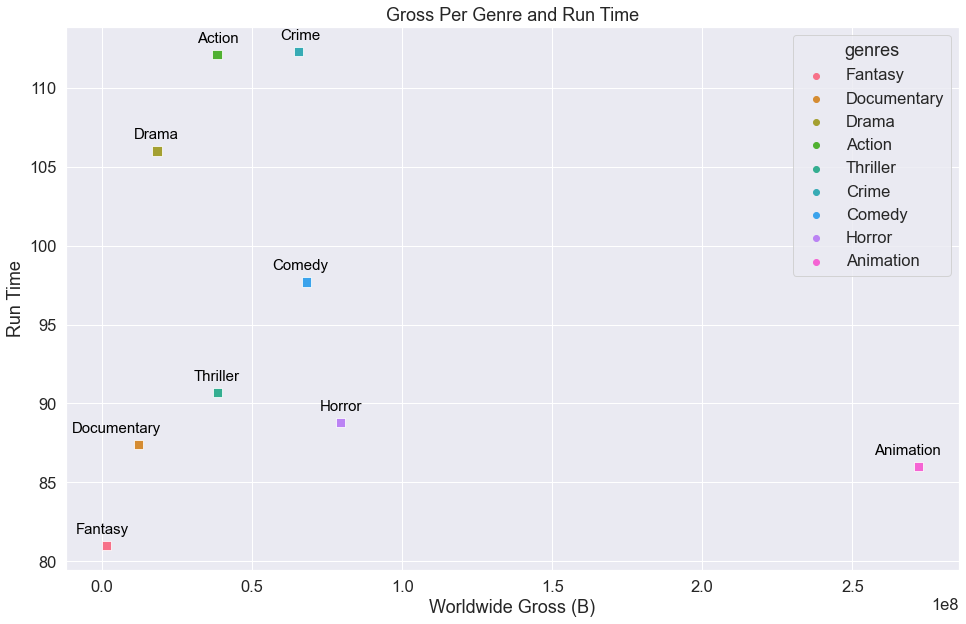

In [74]:
x1 = genre_gross["worldwide_gross"]
y2 = genre_gross["runtime_minutes"]

fig, ax = plt.subplots(figsize=(16,10))
sns.set(font_scale=1.5)
sns.set_palette("rocket")
sns.scatterplot(x=x1, y=y2, hue=genre_gross.index,  marker='s', color='red', s=90)

ax.set_xlabel("Worldwide Gross (B)")
ax.set_ylabel("Run Time")
ax.set_title("Gross Per Genre and Run Time")

for genre in genre_gross.index:
    genre_abbr = genre
    x = genre_gross.loc[genre, "worldwide_gross"]
    y = genre_gross.loc[genre, "runtime_minutes"]
    ax.annotate(genre_abbr, xy=(x, y), xytext=(22, 12), textcoords='offset points', ha='right', fontsize=15, color='black')

plt.show()